# <center> Global Video Game Sales

#### Ezgi Tunalı

Analyzing Publish Related Dynamics and Sales for the Global Top 100 Games

In [228]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
import matplotlib as mp
import seaborn as sb
from sklearn import preprocessing
import numpy as np
from scipy import stats
import pandas as pd
from scipy.stats import spearmanr
from matplotlib import cm
from pandas.plotting import table
pd.options.display.float_format = '{:,.4f}'.format

In [229]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Data Preprocessing

In [230]:
gamesales_df = pd.read_csv('vgsales.csv', sep=",")
gamesales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,"2,006.0000",Sports,Nintendo,41.4900,29.0200,3.7700,8.4600,82.7400
1,2,Super Mario Bros.,NES,"1,985.0000",Platform,Nintendo,29.0800,3.5800,6.8100,0.7700,40.2400
2,3,Mario Kart Wii,Wii,"2,008.0000",Racing,Nintendo,15.8500,12.8800,3.7900,3.3100,35.8200
3,4,Wii Sports Resort,Wii,"2,009.0000",Sports,Nintendo,15.7500,11.0100,3.2800,2.9600,33.0000
4,5,Pokemon Red/Pokemon Blue,GB,"1,996.0000",Role-Playing,Nintendo,11.2700,8.8900,10.2200,1.0000,31.3700


In [231]:
gamesales_df.shape

(16598, 11)

In [232]:
gamesales_df.describe()#.astype(int)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,"16,598.0000","16,327.0000","16,598.0000","16,598.0000","16,598.0000","16,598.0000","16,598.0000"
mean,"8,300.6053","2,006.4064",0.2647,0.1467,0.0778,0.0481,0.5374
std,"4,791.8539",5.8290,0.8167,0.5054,0.3093,0.1886,1.5550
min,1.0000,"1,980.0000",0.0000,0.0000,0.0000,0.0000,0.0100
25%,"4,151.2500","2,003.0000",0.0000,0.0000,0.0000,0.0000,0.0600
50%,"8,300.5000","2,007.0000",0.0800,0.0200,0.0000,0.0100,0.1700
75%,"12,449.7500","2,010.0000",0.2400,0.1100,0.0400,0.0400,0.4700
max,"16,600.0000","2,020.0000",41.4900,29.0200,10.2200,10.5700,82.7400


In [233]:
gamesales_df.isnull().sum() #nulls can be simply discarded

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [234]:
gamesales_df = gamesales_df.dropna(axis = 0)
#gamesales_df.isnull().sum()
gamesales_df.reset_index(drop=True, inplace=True)

In [235]:
gamesales_df["Year"] = gamesales_df["Year"].astype(int) 
#gamesales_df["Year"].dtypes

In [236]:
duplicate = gamesales_df.duplicated()
gamesales_df[duplicate] #no duplicates

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


<b> Is there more than one game with same ranking ? 

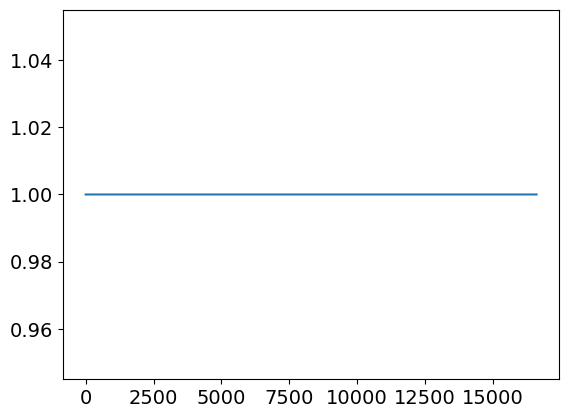

In [237]:
plt.plot(gamesales_df.groupby('Rank')['Rank'].count()) # - tüm ranklar unique
#there are 1 of each rank but some ranks are missing olabilir, hele drop na'den sonra kesin öyle oluyor.

In [238]:
gamesales_df.describe() #after dropping nulls, each have same count

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,"16,291.0000","16,291.0000","16,291.0000","16,291.0000","16,291.0000","16,291.0000","16,291.0000"
mean,"8,290.1902","2,006.4056",0.2656,0.1477,0.0788,0.0484,0.5409
std,"4,792.6544",5.8324,0.8224,0.5093,0.3119,0.1901,1.5673
min,1.0000,"1,980.0000",0.0000,0.0000,0.0000,0.0000,0.0100
25%,"4,132.5000","2,003.0000",0.0000,0.0000,0.0000,0.0000,0.0600
50%,"8,292.0000","2,007.0000",0.0800,0.0200,0.0000,0.0100,0.1700
75%,"12,439.5000","2,010.0000",0.2400,0.1100,0.0400,0.0400,0.4800
max,"16,600.0000","2,020.0000",41.4900,29.0200,10.2200,10.5700,82.7400


<b> How many distinct publishers, genres, platfroms are ?

In [239]:
gamesales_df.groupby('Publisher')['Publisher'].count().sort_values(ascending = False)
#there are 576 distinct publisher, top 5 publishers can be seen

Publisher
Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Eidos Interactive                          196
Midway Games                               196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3P

In [240]:
gamesales_df.groupby('Genre')['Genre'].count().sort_values(ascending = False)
#there are 12 distinct genres. Action, sports and misc are top 3.

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [241]:
gamesales_df.groupby('Platform')['Platform'].count().sort_values(ascending = False)
#there are 31 distinct platforms, top 5 platforms may be important

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [242]:
#Alternatively (only for finding numbers, not the details)

gamesales_df[["Publisher","Platform","Genre"]].nunique()

Publisher    576
Platform      31
Genre         12
dtype: int64

<b> CORRELATION MATRIX

In [243]:
#for one sided correlation graph

#from matplotlib import cm
#fig = plt.figure(figsize =(15, 10))
#mp.rcParams.update({'font.size': 14})
#mask = np.triu(gamesales_df.corr())
#sb.heatmap(gamesales_df.corr(), cmap='Blues', annot=True, fmt='.2g',square =True, mask=mask);

<AxesSubplot:>

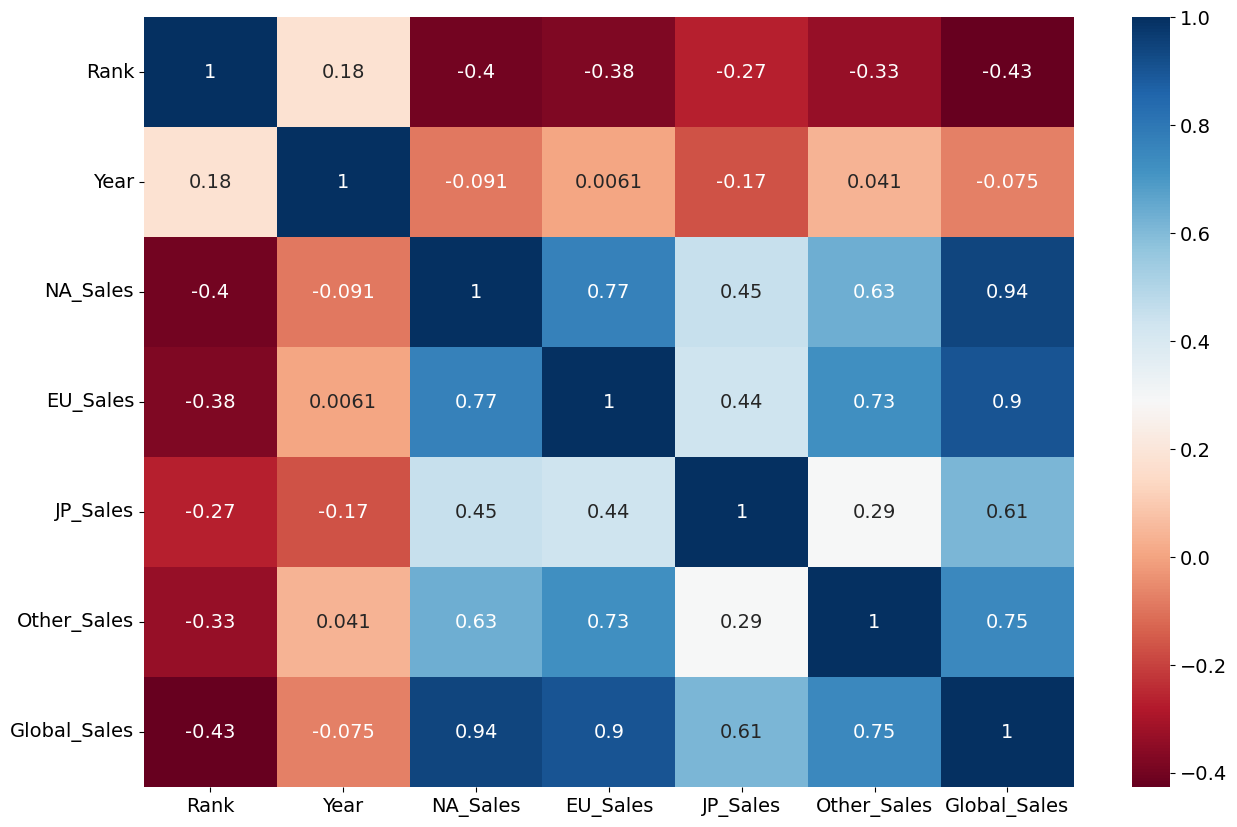

In [244]:
fig = plt.figure(figsize =(15, 10))
mp.rcParams.update({'font.size': 14})
#corr_matrix = gamesales_df[["Rank","Global_Sales"]].corr() 
corr_matrix = gamesales_df.corr() 
sb.heatmap(corr_matrix, cmap = cm.RdBu , annot=True)

- A significant amount of sales is constituted of NA and EU sales, rather than JP sales <p>
- The most negatively correlated feature with the rank is global sales, which suggests that relatively higher expenditures raise the expectations and results in lower rankings.

<b> 1.The relationship between video game expenditure and user satisfaction to understand consumer behavior </b>

In [245]:
#related columns global_sales vs rank
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import stats

gs = gamesales_df["Global_Sales"]
r = gamesales_df["Rank"]

# calculate spearman's correlation
coef, p = spearmanr(gs, r)
print("Spearmans correlation coefficient: %.8f" % coef) 
# coefficient is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables).
# interpret the significance
alpha = 0.05
if p > alpha:
    print("Samples are uncorrelated (fail to reject H0) p=%.3f" % p)
else:
    print("Samples are correlated (reject H0) p=%.8f" % p)

Spearmans correlation coefficient: -0.99962471
Samples are correlated (reject H0) p=0.00000000


In [246]:
#calculation correlation coefficient and p-value between x and y
[x,y] = pearsonr(gs, r) 
print("Pearson correlation coefficient: ", x)
# Pearson correlation coefficient measures the statistical relationship, or association, between two continuous variables.
# Pearson CC is eqaul to the corresponding value in correlation matrix, as both are based on linear relationships.
print("Two-tailed p-value: %.8f" % y)

Pearson correlation coefficient:  -0.42697487174026233
Two-tailed p-value: 0.00000000


The difference of Spearmans and Pearsons correlation coefficients: 
- Pearson coefficient works with a linear relationship between the two variables whereas the Spearman Coefficient works with monotonic relationships as well.
- Pearson - based on the method of covariance.

<b> 2.Examining the most popular platform-genre combinations in the top 100 games to inform game development decisions </b>

same methods can be carried out for different scenarios like:
- given a specific genre or platform which publisher should be chosen
- having a specific publisher preference what kind of games should be produced in different sales areas.
- given a sales target which platform-genre-publisher combinations are feasible 

In [247]:
#distint platform-genre pairlarının rankleri ile kruskal wallis  

platform_genre_pairs = gamesales_df[["Platform","Genre"]]#.to_dict()
platform_genre_pairs = platform_genre_pairs.drop_duplicates()
platform_genre_pairs.head(10)

#there are 293 unique pairs of platforms and genres. It is a lot of groups for statistical comparison. Some elimination or selection steps should be carried

,Platform,Genre
0,Wii,Sports
1,NES,Platform
2,Wii,Racing
4,GB,Role-Playing
5,GB,Puzzle
6,DS,Platform
7,Wii,Misc
8,Wii,Platform
9,NES,Shooter
10,DS,Simulation


In [248]:
#checking the count of distinct ranks of platform-genre pairs to eliminate if there is so little info, very few number of rankings 

gamesales_df['Platform_Genre_Pair'] = gamesales_df['Platform'] + gamesales_df['Genre']
platform_genre_counts = (gamesales_df.groupby('Platform_Genre_Pair')['Rank'].count()).to_dict()
gamesales_df['rank_count']  = gamesales_df['Platform_Genre_Pair'].map(platform_genre_counts)
gamesales_df.head(10) #1st and 4th instances are good example of what mapping is for

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Genre_Pair,rank_count
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.4900,29.0200,3.7700,8.4600,82.7400,WiiSports,256
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.0800,3.5800,6.8100,0.7700,40.2400,NESPlatform,28
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.8500,12.8800,3.7900,3.3100,35.8200,WiiRacing,92
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.7500,11.0100,3.2800,2.9600,33.0000,WiiSports,256
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.2700,8.8900,10.2200,1.0000,31.3700,GBRole-Playing,21
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.2000,2.2600,4.2200,0.5800,30.2600,GBPuzzle,15
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.3800,9.2300,6.5000,2.9000,30.0100,DSPlatform,89
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.0300,9.2000,2.9300,2.8500,29.0200,WiiMisc,272
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.5900,7.0600,4.7000,2.2600,28.6200,WiiPlatform,57
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.9300,0.6300,0.2800,0.4700,28.3100,NESShooter,7


In [249]:
pg_comp_df = gamesales_df.loc[gamesales_df['rank_count'] >= 20] #eliminating instances which have platform-genre pair whihc occurs in less than 20 rankings

In [274]:
platform_genre_ranks = (pg_comp_df.groupby(['Platform','Genre','Platform_Genre_Pair']).Rank
   .agg(["mean"])
   .rename(columns="{}_of_Rank".format)
   .sort_values("mean_of_Rank", ascending=True)) 

platform_genre_ranks.head(10) 

,,,mean_of_Rank
Platform,Genre,Platform_Genre_Pair,
NES,Platform,NESPlatform,"1,695.4286"
2600,Shooter,2600Shooter,"3,194.0455"
GB,Role-Playing,GBRole-Playing,"3,589.0000"
XOne,Shooter,XOneShooter,"4,263.6364"
PS4,Shooter,PS4Shooter,"4,269.1471"
SNES,Platform,SNESPlatform,"4,426.0385"
PS3,Shooter,PS3Shooter,"4,822.8645"
SNES,Fighting,SNESFighting,"4,929.3600"
2600,Action,2600Action,"4,973.4727"


In [292]:
stat_comp_pg = pd.DataFrame(platform_genre_ranks.head(3))
stat_comp_pg=stat_comp_pg.reset_index()
stat_comp_pg 
#= stat_comp_pg.rename(columns={'mean_of_Rank':''})
#stat_comp_pg.columns.values

,Platform,Genre,Platform_Genre_Pair,mean_of_Rank
0,NES,Platform,NESPlatform,"1,695.4286"
1,2600,Shooter,2600Shooter,"3,194.0455"
2,GB,Role-Playing,GBRole-Playing,"3,589.0000"


There are still so many groups for statistical comparison. Arbitrarily top 3 groups are chosen for the statistical tests, as the mean_of_Rank differences between 3th and 4th pairs are relatively more than the prior pairs.

In [293]:
#for a nonpaired multiple groups testing, Kruskal Wallis test can be used.
first_pair = []
second_pair = []
third_pair = []


for i in range(len(gamesales_df)):
    if gamesales_df['Platform_Genre_Pair'][i] == stat_comp_pg['Platform_Genre_Pair'][0]:
        first_pair.append(gamesales_df['Rank'][i])
        continue
    elif gamesales_df['Platform_Genre_Pair'][i] == stat_comp_pg['Platform_Genre_Pair'][1]:
        second_pair.append(gamesales_df['Rank'][i])
        continue
    elif gamesales_df['Platform_Genre_Pair'][i] == stat_comp_pg['Platform_Genre_Pair'][2]:
        third_pair.append(gamesales_df['Rank'][i])

In [295]:
#H₀: μ₁=μ₂=μ₃ or The mean of the samples is the same.
#H₁: At least one of them is different.

F, p_value = stats.kruskal(first_pair, second_pair, third_pair)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis") #not same
else:
    print("Fail to reject null hypothesis") #same 

p value:0.021606
Reject null hypothesis


In [299]:
#NES platform Platform genre is significantly better than others
#one-sided statistical tests - mannwhitney

#H₀: First_pair has higher or equal rank mean distribution than that of second_pair
#H₁: First_pair has lower rank mean distribution than that of second_pair

ttest,pvalue = stats.mannwhitneyu(first_pair, second_pair, alternative="less") #duration:50456100, duration_ms:5795516925530589860656450288084
print("p-value:%.8f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis - statistically significant difference")
else:
    print("Fail to reject null hypothesis")

p-value:0.00381786
Reject null hypothesis - statistically significant difference


In [300]:
#H₀: Second_pair has higher or equal rank mean distribution than that of third_pair
#H₁: Second_pair has lower rank mean distribution than that of third_pair

ttest,pvalue = stats.mannwhitneyu(second_pair, third_pair, alternative="less") #duration:50456100, duration_ms:5795516925530589860656450288084
print("p-value:%.8f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis - statistically significant difference")
else:
    print("Fail to reject null hypothesis - not a statistically significant difference")

p-value:0.53388428
Fail to reject null hypothesis


<b> Conclusion </b><p>
While 'NES-Platform' pair have statistically significantly better rankings;
    there is no statistically significant difference between '2600-Shooter' and 'GB-RolePlaying' platform-genre pairs.

## FUTURE WORK

Some more research questions: <p>
- Is there a significant difference between publishers in terms of rank and/or global sales?
- How important the recency of the game for the game ranking ?
- What are the most popular(rank) 3 publishers for each sales area ?
- Using ML algorithms; 
    * There are nonexisting but possible combinations - what could be the estimated ranking for those combinations 
    * If the objective function is multi-objective including both the ranking but also the global_sales, how would the platform-genre or publisher preferences would change ?
    * Assuming that, there is a given budget and genre, is hybrid allocation between different publishers and platforms results in better objective function value ?

## REFERENCES

Original Dataset: https://zenodo.org/record/5898311#.Y-eXby8RrB9 <p>
Kaggle Dataset: https://www.kaggle.com/datasets/thedevastator/global-video-game-sales <p>
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/#:~:text=Pearson%27s%20correlation%20coefficient%20is%20the,on%20the%20method%20of%20covariance. <p>
https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8